# Storytelling Data Visualization on Exchange Rates

## Table of contents 
* [Introducing the Dataset](#Introducing-the-dataset)
* [Cleaning data](#Cleaning-data)
* [Rolling Mean](#Rolling-Mean)
* [Coming up with an Idea](#Coming-up-with-an-Idea)
* [Data Visualization](#Data-Visualization)
    * [The coronavirus pandemic](#The-coronavirus-pandemic)
    * [Financial Crisis](#Financial-Crisis)
    * [The four US president](#The-four-US-president)
    

##  Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2024. The euro (symbolized with €) is the official currency in most of the countries of the European Union
on

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available o[n Kagg](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)le — the data source is the European Central Ba1.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

exchange_rates=pd.read_csv('euro-daily-hist_1999_2024.csv', encoding = 'utf-8')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [16]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6534,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [17]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

## Cleaning data

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar.

In [9]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


We'll isolate the Time and the US_dollar columns to analysis and change data type of US_dollar column

In [11]:
euro_to_dollar=exchange_rates[['Time','US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

In [12]:
euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar']!="-"]
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)

In [13]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


## Rolling Mean

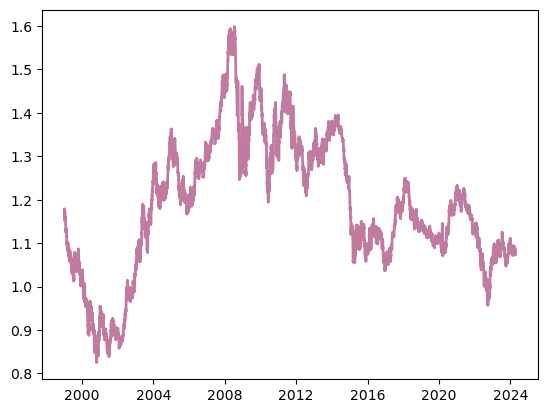

In [15]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'], c='#c27ba0', linewidth=2)
plt.show()

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years). However, we want to hide it and show only the long-term trends, we can use the **rolling mean** (also known as the moving average).

The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).
We'll try seeing how our line plot changes visually as we increase the rolling window.

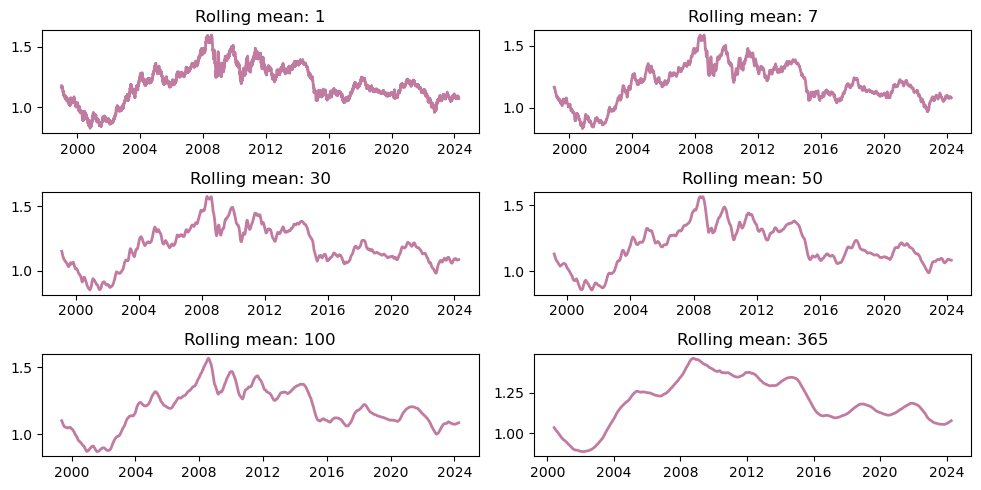

In [17]:
nrolling=[1,7,30,50,100,365]
plt.figure(figsize=(10,5))
for i, n in enumerate(nrolling, start=1):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(n).mean(), c='#c27ba0', linewidth=2)
    plt.title(f'Rolling mean: {n}')
plt.tight_layout()
plt.show()        

In [18]:
euro_to_dollar['rolling_mean']=euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar['year']=euro_to_dollar['Time'].dt.year
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6473 entries, 0 to 6534
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          6473 non-null   datetime64[ns]
 1   US_dollar     6473 non-null   float64       
 2   rolling_mean  6444 non-null   float64       
 3   year          6473 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 227.6 KB


## Coming up with an Idea

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 and 2021 data and the 2017-2022 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last four US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021)), and Joe Biden (2021-2024). We can use a line plot.

## Data Visualization

### The coronavirus pandemic

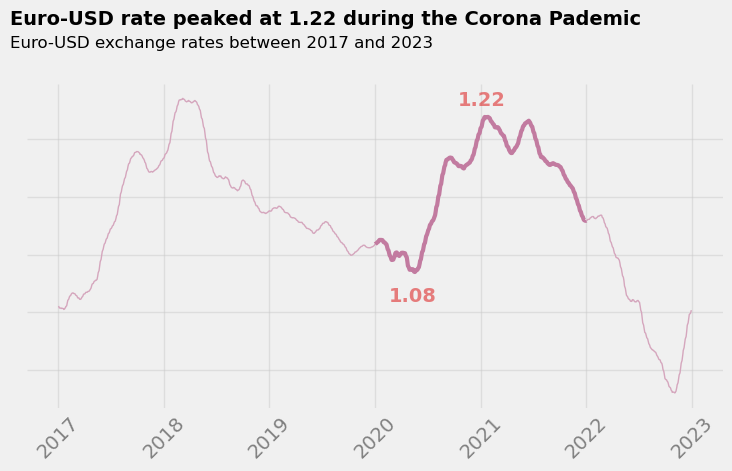

In [23]:
import matplotlib.style as style
df=euro_to_dollar.copy()[(euro_to_dollar['year']>=2017)&(euro_to_dollar['year']<=2022)]
corona=euro_to_dollar.copy()[(euro_to_dollar['year']==2020)|(euro_to_dollar['year']==2021)]
style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(df['Time'],df['rolling_mean'],color='#d5a6bd',linewidth=1)
ax.plot(corona['Time'],corona['rolling_mean'],color='#c27ba0',linewidth=3)
ax.grid(alpha=0.5)
#ax.grid(visible=False)
ax.tick_params(bottom=0, left=0)
ax.tick_params(axis='x',colors='grey')
ax.set_yticklabels([])
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.text(18310, 1.06,'1.08',alpha=0.5,c='#db0808',weight='bold')
ax.text(18550, 1.23,'1.22', alpha=0.5,c='#db0808',weight='bold')
ax.text(17000, 1.3,"Euro-USD rate peaked at 1.22 during the Corona Pademic",
        weight='bold')
ax.text(17000, 1.28,'Euro-USD exchange rates between 2017 and 2023',
        size=12)   
plt.xticks(rotation=45)
plt.show()

In [24]:
df.loc[(df['year']==2020)|(df['year']==2021),'rolling_mean'].min()


1.0849966666666666

In [25]:
df.loc[(df['year']==2020)|(df['year']==2021),'rolling_mean'].max()

1.2195766666666665

### Financial Crisis

In [27]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['year']>=2006)&(euro_to_dollar['year']<=2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['year']>=2007)&(euro_to_dollar['year']<=2008)]

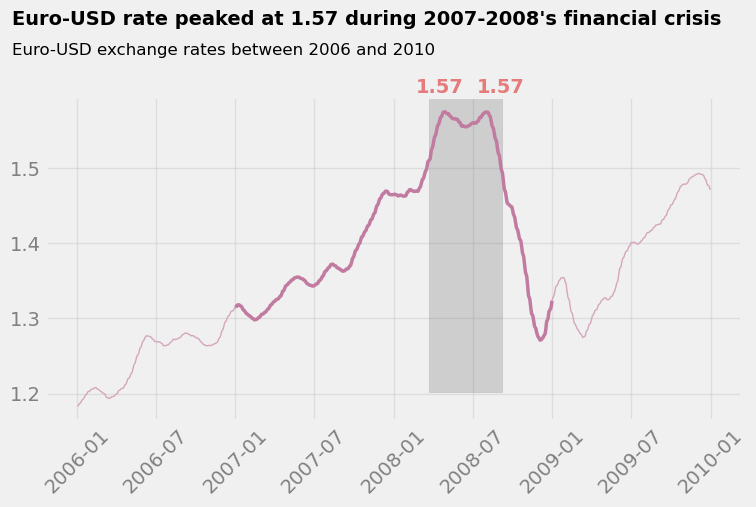

In [28]:
style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(financial_crisis['Time'],financial_crisis['rolling_mean'],color='#d5a6bd', linewidth=1)
ax.plot(financial_crisis_7_8['Time'],financial_crisis_7_8['rolling_mean'],color='#c27ba0',linewidth=2.5)
ax.axvspan(xmin=13960, xmax=14130, ymin=0.09,
           alpha=0.3, color='grey')
ax.text(13000, 1.69, "Euro-USD rate peaked at 1.57 during 2007-2008's financial crisis",
       weight='bold')
ax.text(13000, 1.65, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)
ax.grid(alpha=0.5)
ax.text(13930, 1.6,'1.57',alpha=0.5, c='#db0808', weight='bold')
ax.text(14070, 1.6,'1.57', alpha=0.5, c='#db0808',weight='bold')
ax.tick_params(axis='x',colors='grey')
ax.tick_params(axis='y',colors='grey')
plt.xticks(rotation=45)
plt.show()

In [29]:
financial_crisis_7_8.loc[(financial_crisis_7_8['year']==2008) & (financial_crisis_7_8['Time'].dt.month>=6),'rolling_mean'].max()

1.5741766666666666

In [30]:
financial_crisis_7_8.loc[(financial_crisis_7_8['year']==2008) & (financial_crisis_7_8['Time'].dt.month<6),'rolling_mean'].max()

1.5743333333333331

### The four US president

In [32]:
presidents = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year <= 2024)]
bush = presidents.copy(
       )[presidents['Time'].dt.year < 2009]
obama = presidents.copy(
       )[(presidents['Time'].dt.year >= 2009) & (presidents['Time'].dt.year < 2017)]
trump = presidents.copy(
       )[(presidents['Time'].dt.year >= 2017) & (presidents['Time'].dt.year < 2021)]
biden = presidents.copy(
       )[(presidents['Time'].dt.year >= 2021) & (presidents['Time'].dt.year <= 2024)]

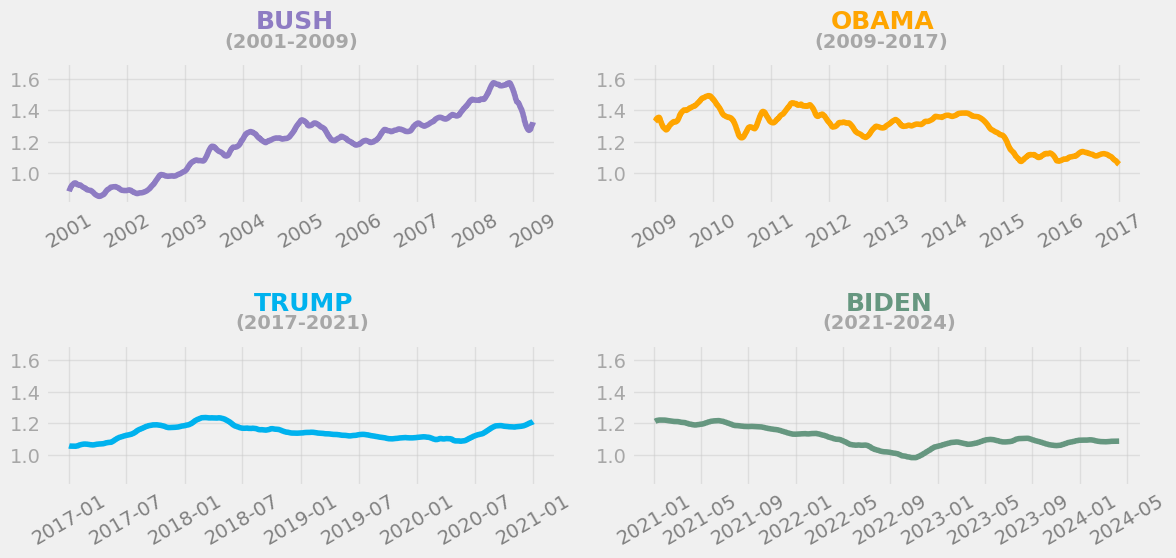

In [128]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')
### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)

axes = [ax1, ax2, ax3, ax4]
### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)
    ax.tick_params(axis='x', colors='grey', rotation=30)

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#8e7cc3')
ax1.text(12500, 1.92, 'BUSH', fontsize=18, weight='bold', color='#8e7cc3')
ax1.text(12300, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax2.text(15350, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(15250, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#00B2EE')
ax3.text(17750, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(17690, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

### Ax4: Biden
ax4.plot(biden['Time'], biden['rolling_mean'], color='#669780')
ax4.text(19120, 1.92, 'BIDEN', fontsize=18, weight='bold', color='#669780')
ax4.text(19060, 1.8, '(2021-2024)', weight='bold', alpha=0.3)

plt.tight_layout()
plt.show()

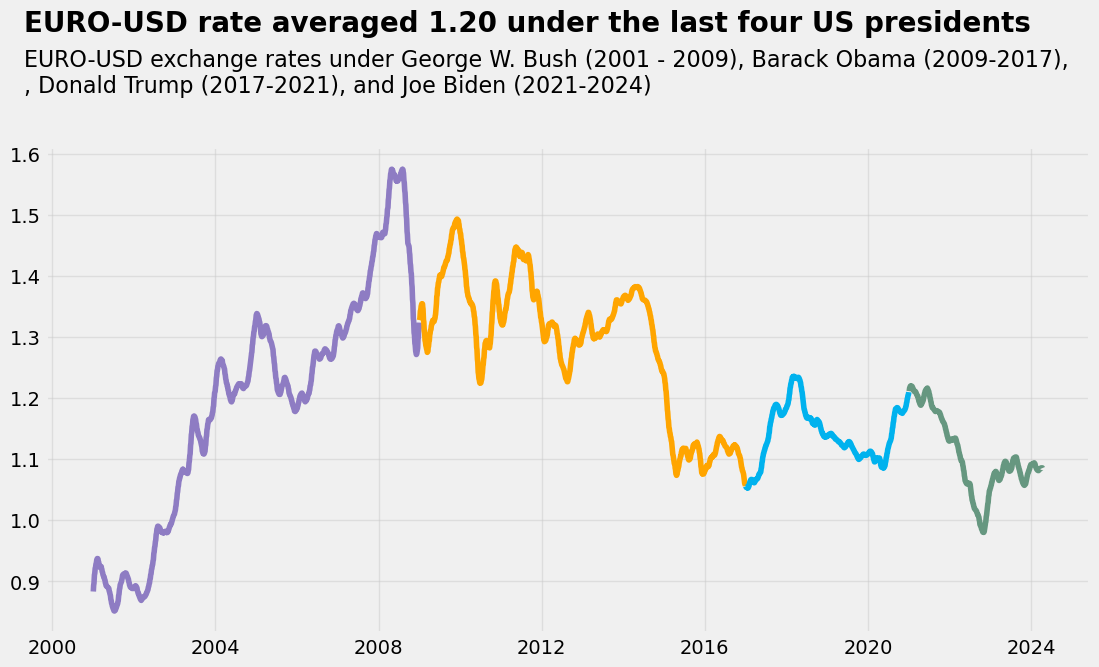

In [112]:
plt.figure(figsize=(12, 6))
ax5 = plt.subplot()
ax.set_ylim(0.8, 1.7)
ax.set_yticks([1.0, 1.2, 1.4, 1.6])
ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
               alpha=0.3)
ax.grid(alpha=0.5)
ax.tick_params(axis='x', colors='grey')
ax5.plot(bush['Time'], bush['rolling_mean'],
        color='#8e7cc3')
ax5.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax5.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax5.plot(biden['Time'], biden['rolling_mean'],
        color='#669780')
### Adding a title and a subtitle
ax5.text(10700,1.8, 'EURO-USD rate averaged 1.20 under the last four US presidents',
         fontsize=20, weight='bold')
ax5.text(10700,1.7, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),\n, Donald Trump (2017-2021), and Joe Biden (2021-2024)''', fontsize=16)

ax5.grid(alpha=0.5)
plt.show()